In [28]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


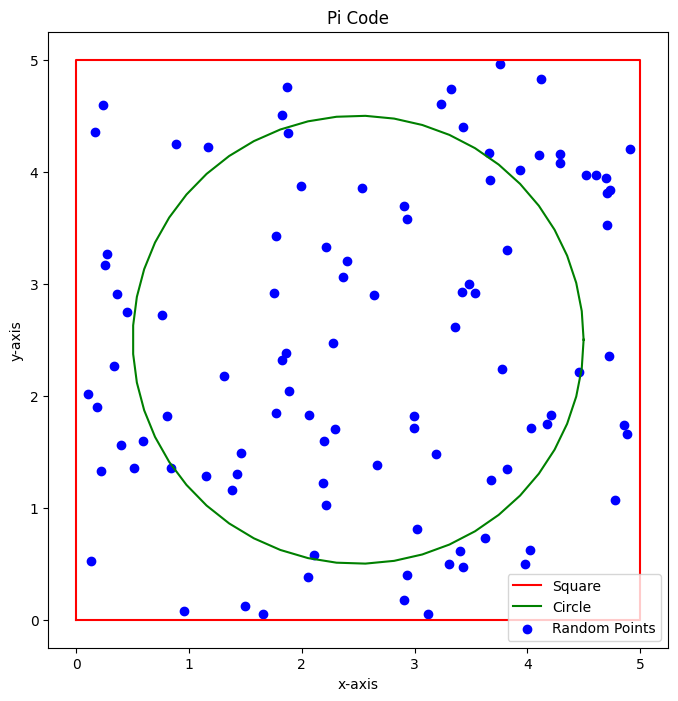

In [38]:
def picode(sidelength,radius,points):

    squarex= np.array([0,sidelength,sidelength,0,0])
    squarey= np.array([0,0,sidelength,sidelength,0])

    theta = np.linspace(0,2*np.pi,50)
    circlex = radius*np.cos(theta)+sidelength/2
    circley = radius*np.sin(theta)+sidelength/2

    randomx = np.random.uniform(0,sidelength,points)
    randomy = np.random.uniform(0,sidelength,points)

    plt.figure(figsize=(8,8))
    plt.plot(squarex,squarey,label='Square',color='r')
    plt.plot(circlex,circley,label='Circle',color='g')
    plt.scatter(randomx,randomy,label="Random Points",color='b')
    plt.title("Pi Code")
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend()
    plt.show()

picode(5,2,100)